# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-10-24 00:28:23--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-10-24 00:28:24--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

c

In [2]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [3]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [4]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [5]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


Considero que las siguientes categorías son las más difíciles para segmentar a los clientes:
- El número de factura es una variable que es aleatoria y por ello no existe facilidad para segmentar, ya que no existiría un patrón claro para determinar dicha homogeneidad en los clientes
- De igual manera, el identificador del clientes es un número del que no se pueden sacar conclusiones, es aleatorio. Los números no permiten observar con  claridad la segmentación debido a la dispersión que pueden tener y el número de combinacones que pueden existir

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [9]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


Todas las variables están completas, ninguna presenta datos nulos

## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [12]:
df['total_value'] = df['quantity'] * df['price']
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,edad,total_value
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1997,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,2004,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,2005,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,1959,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1972,242.40


Las variables que podrian funcionar son la cantidad de clientes por género para saber a que público apostarle y en qué segmentos mejorar. Además, el tiempo que ha pasado desde la última compra para entender el comportamiento de compra





In [25]:
age_bins = [18, 30, 50, 70]
age_labels = ['Jóvenes', 'Adultos', 'Mayores']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
print("Distribución de clientes por grupo de edad:")
display(df['age_group'].value_counts())

Distribución de clientes por grupo de edad:


,count
age_group,
Adultos,38440
Mayores,37974
Jóvenes,23043


In [31]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y', errors='coerce')

df['tiempo_desde_ultima_compra'] = (pd.to_datetime('today') - df['invoice_date'])

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,edad,total_value,age_group,tiempo_desde_ultima_compra
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,1997,7502.00,Jóvenes,1176 days 01:41:17.249983
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2004,5401.53,Jóvenes,1412 days 01:41:17.249983
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2005,300.08,Jóvenes,1445 days 01:41:17.249983
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1959,15004.25,Mayores,1622 days 01:41:17.249983
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1972,242.40,Mayores,1461 days 01:41:17.249983


## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

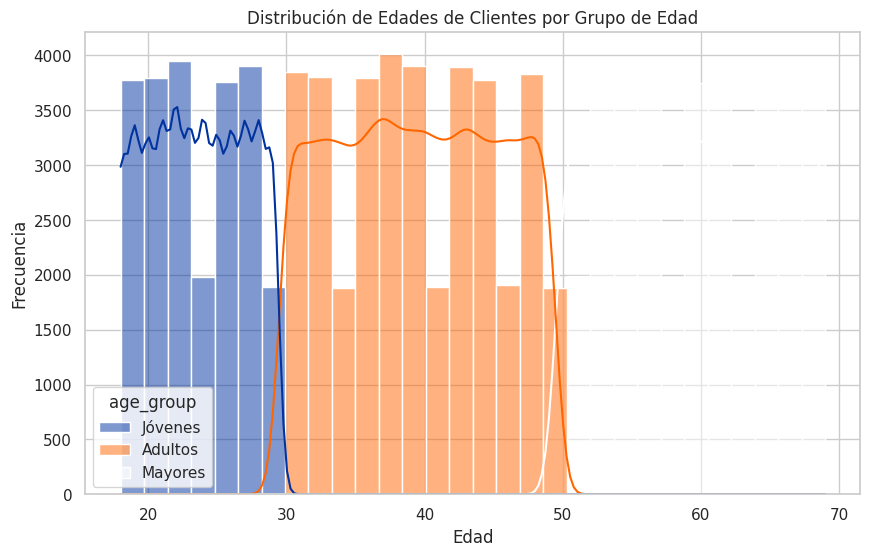

In [94]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='age_group', bins=30, kde=True , palette=corporate_colors)
plt.title('Distribución de Edades de Clientes por Grupo de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

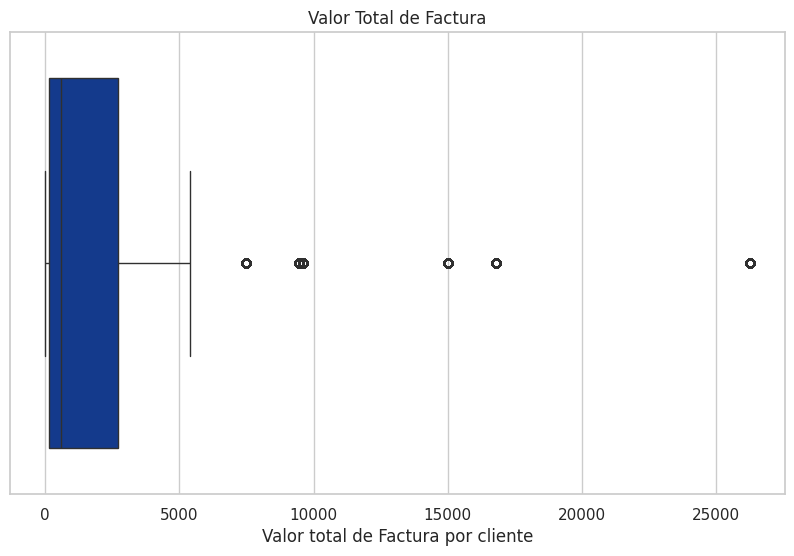

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_value'], color=corporate_colors[0])
plt.title('Valor Total de Factura')
plt.xlabel('Valor total de Factura por cliente')
plt.show()

En la gráfica de edad se ve una dismunución significativa en la mitad del rango entre 18 y 30 años, es decir en el segmento de 25.

En la gráfica de Valor total de factura se observa que el promedio del valor de la ventas está muy por debajo del tope.

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

In [97]:
age_bins = [18, 30, 50, np.inf]
age_labels = ['Jóvenes', 'Adultos', 'Mayores']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
print("Distribución de clientes por grupo de edad:")
df.head()

Distribución de clientes por grupo de edad:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,edad,total_value,age_group,tiempo_desde_ultima_compra
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,1997,7502.00,Jóvenes,1176 days 01:41:17.249983
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2004,5401.53,Jóvenes,1412 days 01:41:17.249983
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2005,300.08,Jóvenes,1445 days 01:41:17.249983
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1959,15004.25,Mayores,1622 days 01:41:17.249983
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1972,242.40,Mayores,1461 days 01:41:17.249983


Segmentaría a los clientes con los rangos de edad junto al método de pago y así, se pueden enfocar campañas en la forma de como pagan los clientes de acuerdo a su grupo de edad.

De igual manera, a partir del género se puede comparar con la candidad de elementos que se compra y así intensificar una campaña según el género

## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

/tmp/ipython-input-4191364669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( data=df, x='category', palette=["#0033A0", "#FF6600"])
/tmp/ipython-input-4191364669.py:2: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot( data=df, x='category', palette=["#0033A0", "#FF6600"])


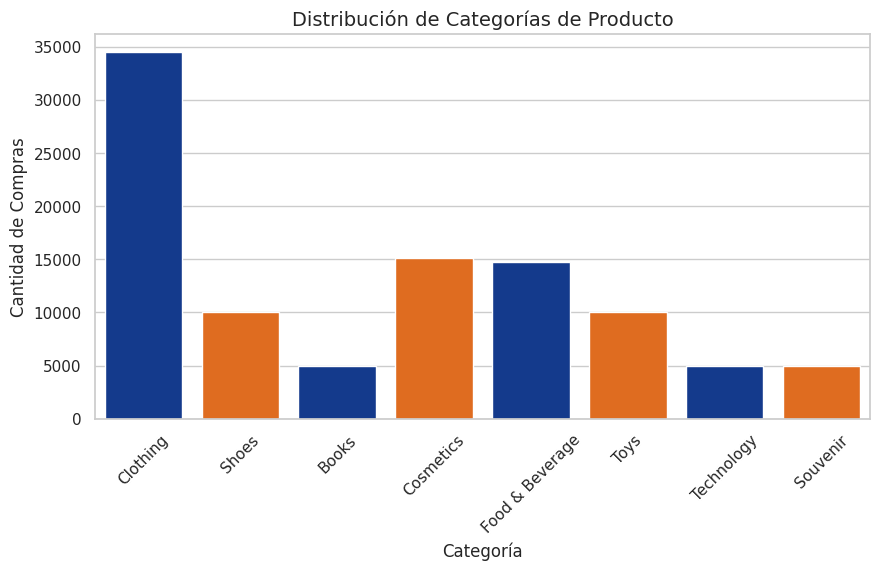

In [108]:
plt.figure(figsize=(10,5))
sns.countplot( data=df, x='category', palette=["#0033A0", "#FF6600"])
plt.title("Distribución de Categorías de Producto", fontsize=14)
plt.xlabel("Categoría")
plt.ylabel("Cantidad de Compras")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-346737770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="payment_method", palette="pastel")


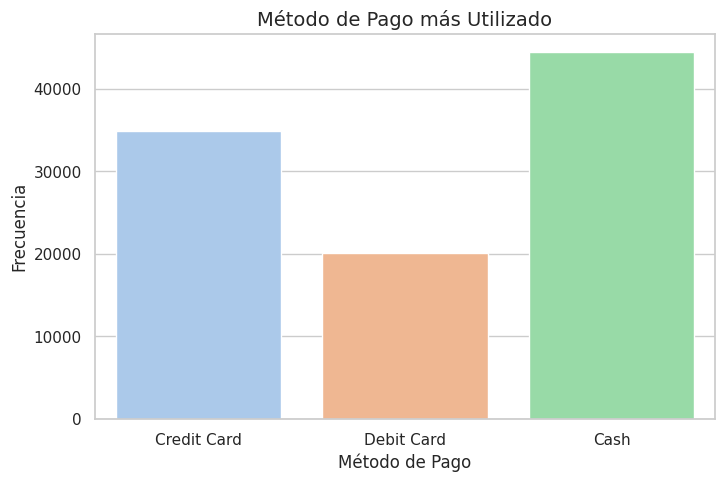

In [109]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="payment_method", palette="pastel")
plt.title("Método de Pago más Utilizado", fontsize=14)
plt.xlabel("Método de Pago")
plt.ylabel("Frecuencia")
plt.show()

/tmp/ipython-input-340650313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_malls.index, y=top_malls.values, palette="muted")


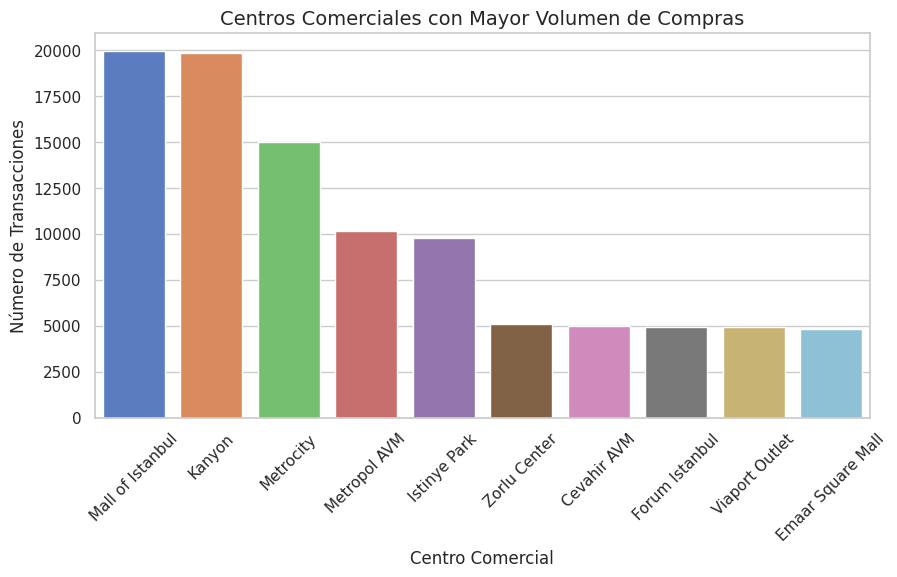

In [111]:
top_malls = df["shopping_mall"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_malls.index, y=top_malls.values, palette="muted")
plt.title("Centros Comerciales con Mayor Volumen de Compras", fontsize=14)
plt.xlabel("Centro Comercial")
plt.ylabel("Número de Transacciones")
plt.xticks(rotation=45)
plt.show()

**Categoría de producto:**
Es el factor más relevante, porque define directamente los intereses del cliente.

Por ejemplo, si “Clothing” y “Shoes” concentran el 70 % de las ventas, se puede enfocar el presupuesto en moda y calzado, creando campañas estacionales o colecciones exclusivas.

**Método de pago:**
Muestra el nivel de digitalización del cliente.

Si predominan las tarjetas de crédito, es buena idea ofrecer promociones bancarias o programas de puntos para que sea más accesible y seguir creciendo en ese sector y además implementar estrategias en las tarjetas de débito para incentivar el consumo ahí

Si el efectivo es común, habría que fortalecer canales físicos y promociones al contado.

**Centro comercial:**
Tiene un impacto geográfico: permite localizar zonas estratégicas de mayor rentabilidad y adaptar campañas locales.

Si un centro comercial destaca por volumen o ticket promedio, puede ser ideal para eventos o promociones exclusivas.

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

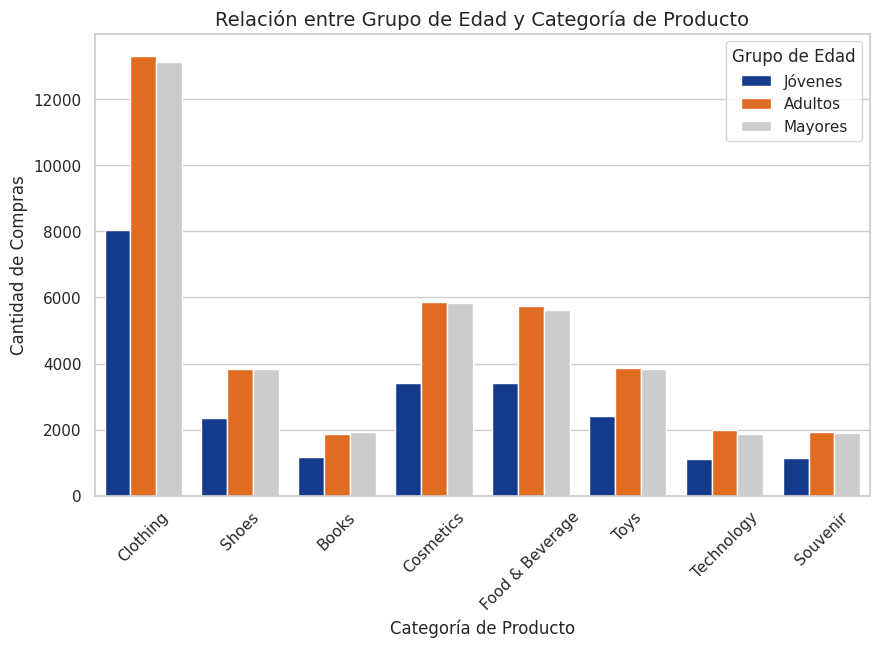

In [113]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="category", hue="age_group", palette=["#0033A0", "#FF6600", "#CCCCCC"])
plt.title("Relación entre Grupo de Edad y Categoría de Producto", fontsize=14)
plt.xlabel("Categoría de Producto")
plt.ylabel("Cantidad de Compras")
plt.xticks(rotation=45)
plt.legend(title="Grupo de Edad")
plt.show()

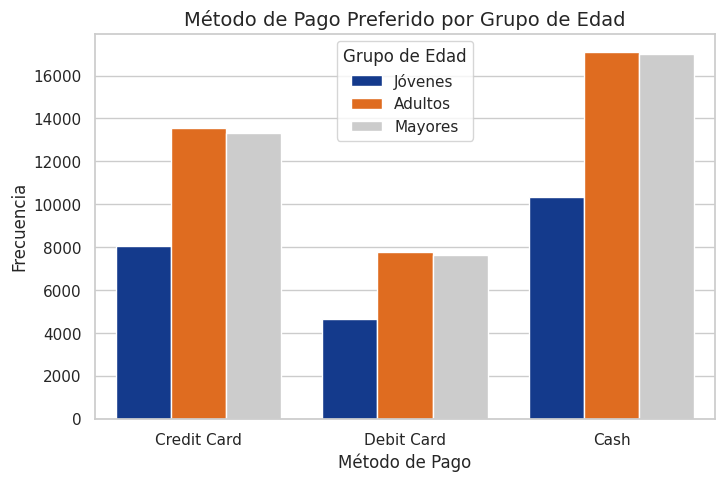

In [114]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="payment_method", hue="age_group", palette=["#0033A0", "#FF6600", "#CCCCCC"])
plt.title("Método de Pago Preferido por Grupo de Edad", fontsize=14)
plt.xlabel("Método de Pago")
plt.ylabel("Frecuencia")
plt.legend(title="Grupo de Edad")
plt.show()

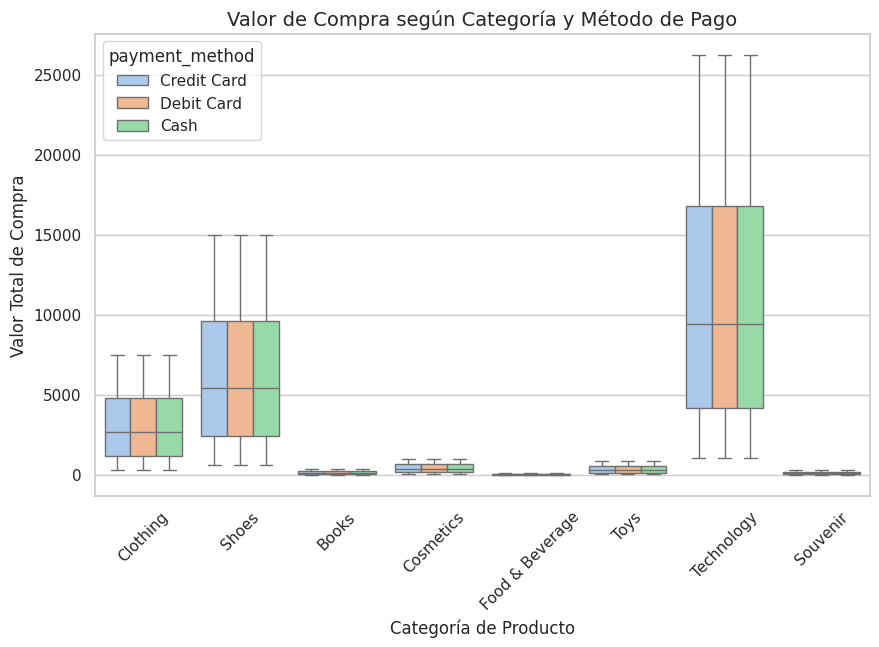

In [116]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="category", y="total_value", hue="payment_method", palette="pastel")
plt.title("Valor de Compra según Categoría y Método de Pago", fontsize=14)
plt.xlabel("Categoría de Producto")
plt.ylabel("Valor Total de Compra")
plt.xticks(rotation=45)
plt.show()

**Edad + Categoría:**

Los adultos (30–59) que compran en categorías como ropa, calzado o electrónica suelen tener mayor poder adquisitivo.

Este grupo puede ser el principal segmento de alto valor, ideal para campañas premium o de fidelización.

**Edad + Método de Pago:**

Si los jóvenes usan principalmente tarjeta de crédito o apps, se puede impulsar el marketing digital y beneficios en pagos online.

Los adultos mayores que usan efectivo podrían responder mejor a promociones presenciales.

**Categoría + Método de Pago:**

Compras de alto valor con tarjeta de crédito definen clientes con mayor capacidad de gasto y con buena historia crediticia.

Este comportamiento es clave para identificar clientes VIP y darles un trato diferente

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

In [117]:
category_counts = df["category"].value_counts()
category_counts

,count
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981


In [137]:
category_counts = df["category"].value_counts()

def simplify_category(cat):
    if cat in ["Souvenir", "Technology", "Books"]:
        return "Tecnología/Entretenimiento"
    elif cat in ["Toys"]:
        return "Toys"
    elif cat in ["Cosmetics"]:
        return "Cosmetics"
    elif cat in ["Clothing"]:
        return "Clothing"
    elif cat in ["Shoes"]:
        return "Shoes"
    elif cat in ["Food & Beverage"]:
        return "Food"
df["category_grouped"] = df["category"].apply(simplify_category)
print("Distribución de categorías agrupadas:")
display(df.category_grouped.value_counts())

Distribución de categorías agrupadas:


,count
category_grouped,
Clothing,34487
Cosmetics,15097
Tecnología/Entretenimiento,14976
Food,14776
Toys,10087
Shoes,10034


Agruparía los libros, los souvenir y los libros ya que son las 4 categorias que estan por debajo de 5000 y es necesario colocarlos en una misma categoría

## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [142]:
df["segmento"] = (df["age_group"].astype(str) + " - " + df["category_grouped"].astype(str) + " - " + df["shopping_mall"].astype(str) )
print("Primeros registros con la nueva columna 'segmento':")
display(df.head())

Primeros registros con la nueva columna 'segmento':


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,edad,total_value,age_group,tiempo_desde_ultima_compra,category_grouped,segmento
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,1997,7502.00,Jóvenes,1176 days 01:41:17.249983,Clothing,Jóvenes - Clothing - Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2004,5401.53,Jóvenes,1412 days 01:41:17.249983,Shoes,Jóvenes - Shoes - Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2005,300.08,Jóvenes,1445 days 01:41:17.249983,Clothing,Jóvenes - Clothing - Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1959,15004.25,Mayores,1622 days 01:41:17.249983,Shoes,Mayores - Shoes - Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1972,242.40,Mayores,1461 days 01:41:17.249983,Tecnología/Entretenimiento,Mayores - Tecnología/Entretenimiento - Kanyon


Los jóvenes y los zapatos son una combinación que podría funcionar por el flujo y la cantidad que representan en el negocio

## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

In [140]:
segment_value = (df.groupby("segmento").agg({"total_value": "mean", "quantity": "sum"}).reset_index().sort_values("total_value", ascending=False))

segment_value.head(10)

,segmento,total_value,quantity
152,Mayores - Shoes - Forum Istanbul,7654.739657,572
32,Adultos - Shoes - Forum Istanbul,7318.094972,579
30,Adultos - Shoes - Cevahir AVM,7229.598827,617
94,Jóvenes - Shoes - Kanyon,7094.487412,1417
97,Jóvenes - Shoes - Metropol AVM,7030.226627,791
153,Mayores - Shoes - Istinye Park,6955.458527,1195
159,Mayores - Shoes - Zorlu Center,6876.476085,651
39,Adultos - Shoes - Zorlu Center,6828.877306,588
95,Jóvenes - Shoes - Mall of Istanbul,6812.238866,1483
35,Adultos - Shoes - Mall of Istanbul,6794.111953,2348


from matplotlib import pyplot as plt
_df_0['total_value'].plot(kind='hist', bins=20, title='total_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['quantity'].plot(kind='hist', bins=20, title='quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='total_value', y='quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['total_value'].plot(kind='line', figsize=(8, 4), title='total_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['quantity'].plot(kind='line', figsize=(8, 4), title='quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

El segmento de Mayores, tenis y forun instambul es importante ya que aunque no es tanta cantidad de articulos vendidos, se mantiene en el puesto 1 de los mas valiosos, los jovenes y los zapatos manejan un alto flujo y se puede potenciar para en CANTIDAD

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.



Based on the segment analysis:

**¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?**

Al observar el DataFrame `segment_value` (calculado en la celda `c9e7f48f`), los segmentos con el valor total promedio más alto son principalmente los de **Calzado** en diferentes grupos de edad y centros comerciales, especialmente en **Forum Istanbul**, **Cevahir AVM** y **Kanyon**. Segmentos como «Mayores - Calzado - Forum Istanbul» y «Adultos - Calzado - Forum Istanbul» muestran valores promedio de transacción elevados. Si bien la frecuencia de compra no se calcula directamente aquí, el alto valor promedio sugiere un gran potencial de generación de ingresos en estos segmentos.

Los segmentos de **Ropa** también muestran una actividad y un potencial significativos, especialmente en el grupo de edad «Adultos».

**¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?**

Para los segmentos con un valor total promedio consistentemente bajo (por ejemplo, segmentos que incluyen “Comida” y “Tecnología/Entretenimiento” en ciertos centros comerciales), las estrategias podrían centrarse en:

*   **Aumentar la frecuencia de compra:** Implementar programas de fidelización, servicios de suscripción (si corresponde a la categoría) o promociones específicas para compras repetidas.

*   **Venta adicional y venta cruzada:** Incentive a los clientes a comprar artículos de mayor precio o productos complementarios dentro de esas categorías. Esto podría hacerse mediante ofertas combinadas o recomendaciones personalizadas.

*   **Resaltar el valor:** Enfatice la asequibilidad y la propuesta de valor de los productos en estas categorías para atraer a clientes sensibles al precio y aumentar potencialmente el volumen.

*   **Promociones específicas:** Ofrezca descuentos o promociones específicos durante horas o días de menor actividad para impulsar el tráfico y las ventas en estos segmentos.

**¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?**

**Categoría:** Las categorías agrupadas muestran claramente diferentes niveles de gasto promedio. "Calzado" y "Ropa" tienden a tener valores de transacción promedio más altos en comparación con "Alimentación" o "Tecnología/Entretenimiento". Esto indica que la categoría de producto influye significativamente en el *valor* de una compra. Las estrategias de marketing deben alinearse con estos patrones de gasto, centrándose en las categorías de alto valor para el crecimiento de los ingresos y en las de menor valor para el volumen o la frecuencia.


*   **Centro comercial:** El centro comercial también influye en el comportamiento de compra, probablemente reflejando la demografía y el poder adquisitivo de la zona circundante. Centros comerciales como Forum Istanbul y Cevahir AVM aparecen en segmentos con valores promedio más altos, lo que sugiere que atraen a clientes que gastan más por transacción. Las estrategias de marketing pueden adaptarse para aprovechar las características específicas de la clientela de cada centro comercial. Por ejemplo, las promociones de productos premium podrían tener un mejor rendimiento en centros comerciales de alto valor, mientras que las promociones centradas en el valor podrían ser más efectivas en otros.

La combinación de categoría y centro comercial proporciona una comprensión más matizada del comportamiento del cliente que cualquier factor por separado, lo que permite campañas de marketing más específicas y efectivas.

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

*   **¿Cuántos segmentos son óptimos para la estrategia de la empresa?**

  La cantidad óptima de segmentos dependerá de la capacidad de la empresa para desarrollar y ejecutar estrategias de marketing diferenciadas para cada uno. Un punto de partida podría ser enfocarse en los 3-5 segmentos de mayor valor identificados en el análisis (por ejemplo, los de 'Shoes' y 'Clothing' en centros comerciales clave para los grupos de edad 'Adultos' y 'Mayores'). A medida que la empresa gane experiencia, podría expandirse a más segmentos.

*   **¿Cómo asignar el presupuesto de marketing entre estos segmentos?**

  La asignación del presupuesto debe ser proporcional al potencial de valor y crecimiento de cada segmento. Los segmentos de alto valor (como 'Mayores - Shoes - Forum Istanbul' o 'Adultos - Shoes - Forum Istanbul') deberían recibir una porción significativa del presupuesto para maximizar el retorno de la inversión. Los segmentos con potencial de crecimiento o alta frecuencia de compra (incluso si el valor promedio es menor) también deberían recibir inversión para fomentar la lealtad y el volumen. Se puede asignar un presupuesto menor a segmentos de bajo valor o difícil acceso, quizás enfocándose en estrategias de bajo costo o experimentales.

*   **¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?**

  Algunos indicadores clave para medir el éxito incluyen:
    *   **Valor Promedio de Compra por Segmento:** Monitorear si las campañas están logrando aumentar el gasto promedio por transacción.
    *   **Frecuencia de Compra por Segmento:** Rastrear cuántas veces los clientes en cada segmento realizan compras en un período determinado.
    *   **Tasa de Conversión por Segmento:** Medir la efectividad de las campañas para convertir interacciones (clics, visitas) en compras.
    *   **Retorno de la Inversión (ROI) por Campaña/Segmento:** Evaluar la rentabilidad de las inversiones de marketing en cada segmento.
    *   **Costo de Adquisición de Cliente (CAC) por Segmento:** Si se realizan campañas de adquisición, medir cuánto cuesta adquirir un nuevo cliente en cada segmento.

**Actividad Final:**

1.  **Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.**

  Basado en el análisis del valor total promedio (celda `c9e7f48f`), el segmento **'Mayores - Shoes - Forum Istanbul'** presenta el valor promedio de compra más alto. Aunque la frecuencia no se calculó directamente, el alto valor lo posiciona como un segmento de alto potencial en términos de ingresos por transacción. Otro segmento con alto potencial en volumen, aunque menor valor promedio, es **'Jóvenes - Shoes - Mall of Istanbul'**.

2.  **Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.**

  Para el segmento **'Mayores - Shoes - Forum Istanbul'**:
    *   **Estrategia:** Campaña de fidelización y experiencia premium.
    *   **Acciones:**
        *   **Eventos Exclusivos en Tienda:** Organizar eventos privados en la sección de calzado de Forum Istanbul para clientes mayores, presentando nuevas colecciones o ediciones limitadas. Ofrecer asesoramiento personalizado.
        *   **Programa de Puntos Dobles:** Ofrecer puntos dobles en compras de calzado para miembros de este segmento, canjeables por descuentos o servicios premium (como limpieza o reparación de calzado).
        *   **Comunicación Personalizada:** Enviar comunicaciones por correo directo o email destacando productos de calzado de alta gama y los beneficios del programa de fidelización. Utilizar un tono que resuene con este grupo de edad.
        *   **Alianzas Estratégicas:** Colaborar con tiendas o servicios frecuentados por este segmento en el área de Forum Istanbul para ofrecer beneficios cruzados.

3.  **Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.**

    *   **Justificación:** Elegimos este segmento por su alto valor promedio de compra, lo que indica que están dispuestos a invertir más por transacción. Una estrategia premium y de fidelización busca capitalizar este comportamiento, aumentando la lealtad y el gasto a largo plazo. Forum Istanbul es un centro comercial clave para este segmento, permitiendo acciones localizadas y efectivas.
    *   **Monitorización:**
        *   **Valor Promedio de Compra del Segmento:** Comparar el valor promedio de compra de este segmento antes y durante la campaña.
        *   **Participación en Eventos/Programa de Puntos:** Rastrear cuántos clientes del segmento participan en los eventos o se inscriben/utilizan el programa de puntos dobles.
        *   **Ventas Atribuidas a la Campaña:** Medir las ventas de calzado en Forum Istanbul que pueden ser directamente atribuidas a la campaña (por ejemplo, a través del uso de códigos de descuento únicos o la identificación de miembros del programa de puntos).
        *   **Encuestas de Satisfacción:** Recopilar feedback del segmento sobre las iniciativas de la campaña para identificar áreas de mejora.
        *   **Análisis de Clientes Recurrentes:** Monitorear si la campaña está aumentando la tasa de clientes recurrentes dentro de este segmento.